In [1]:
#Imports
import pickle
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load files
model = pickle.load(open("wordle_model.pkl", "rb"))
X_columns = pickle.load(open("X_columns.pkl", "rb"))
df = pd.read_csv("wordle_difficulty_data.csv")

In [3]:
#Prepare feature set
X = df[X_columns]
y = df["difficulty"]

In [4]:
#Create SHAP explainer
explainer = shap.Explainer(model)

#Choose an example word
example_index = 0
sample = X.iloc[[example_index]]
sample_word = df.iloc[example_index]["word"]
print(f"Explaining prediction for the word: {sample_word}")

#Predict the class
predicted_class = model.predict(sample)[0]
print(f"Predicted difficulty: {predicted_class}")

Explaining prediction for the word: rossa
Predicted difficulty: Hard


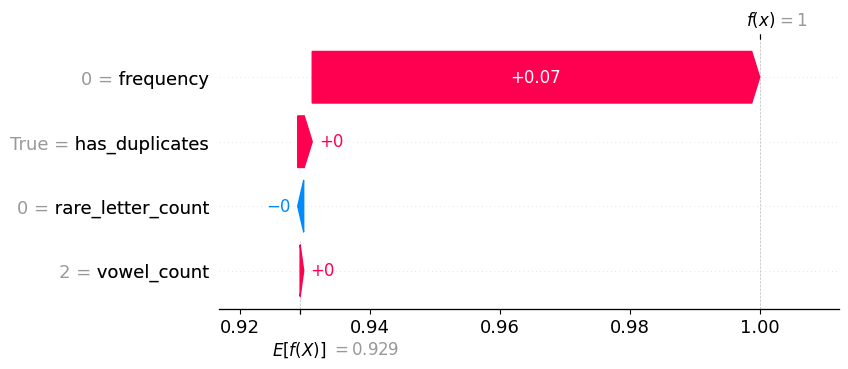

In [5]:
#SHAP values
shap_values = explainer(sample)
class_index = list(model.classes_).index(predicted_class)

#Waterfall plot for the example
shap.plots.waterfall(shap_values[0, :, class_index])

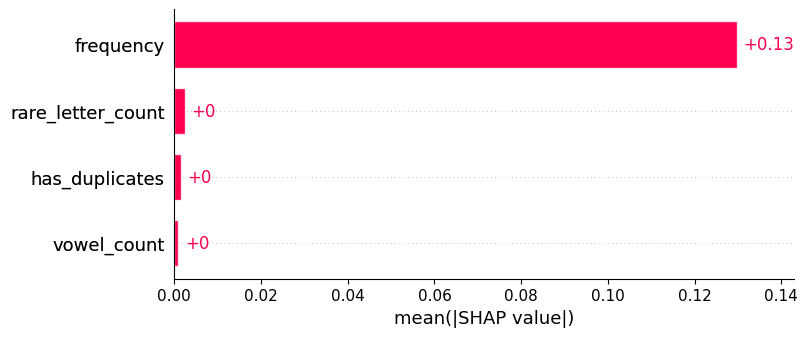

In [7]:
#a subset to keep things light
shap_values_all = explainer(X[:100])

#Choosing a class to show global importance
class_names = model.classes_
class_index = list(class_names).index("Hard")  # or "Medium", "Easy"

#Plot global feature importance for that class
shap.plots.bar(shap_values_all[:, :, class_index])


🔎 Global SHAP Feature Importance for class: Easy


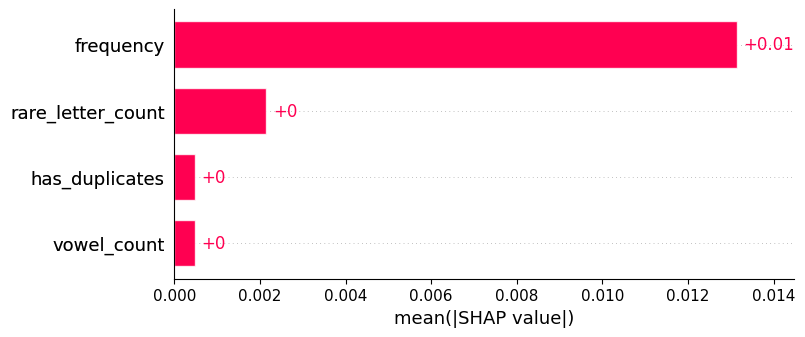


🔎 Global SHAP Feature Importance for class: Hard


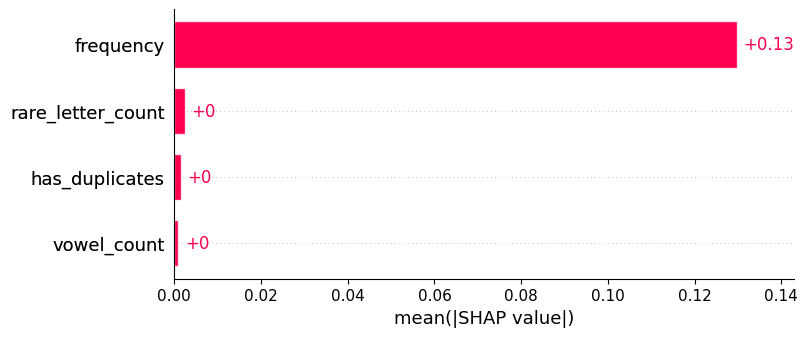


🔎 Global SHAP Feature Importance for class: Medium


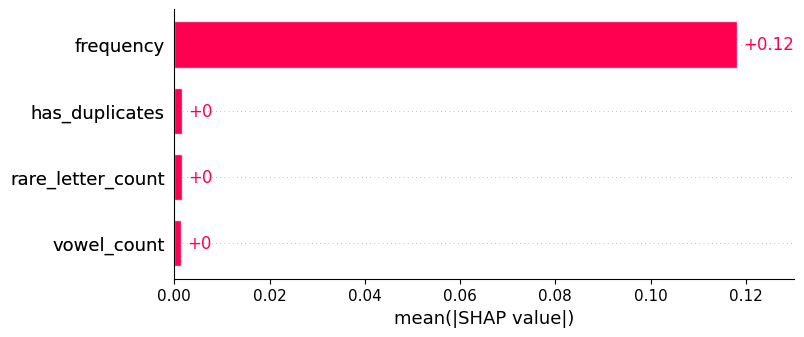

In [9]:
#looping through each class

for i, class_name in enumerate(class_names):
    print(f"\n🔎 Global SHAP Feature Importance for class: {class_name}")
    shap.plots.bar(shap_values_all[:, :, i])
